In [19]:
# import the necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load the breast cancer dataset
X, y = load_breast_cancer(return_X_y=True)

# split the train and test dataset
X_train, X_test,\
    y_train, y_test = train_test_split(X, y,
                                       test_size=0.20,
                                       random_state=23)
# LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 95.6140350877193


c:\Users\ZH483VT\OneDrive - EY\Desktop\Work_Files\Env_1\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


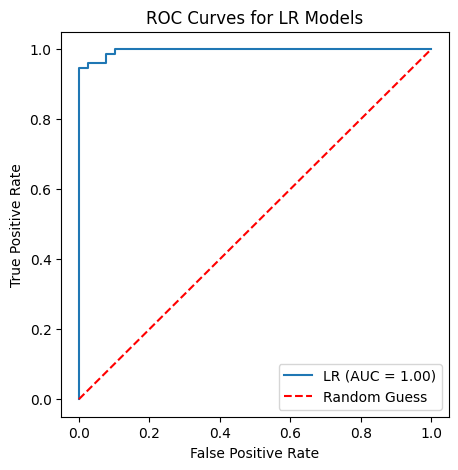

In [43]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,threhods = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
# plt.plt(fpr,tpr)

import  matplotlib.pyplot as plt
   
# Plot ROC curve for each model
plt.figure(figsize=(5, 5))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'LR (AUC = {roc_auc:.2f})')
 
# Plot random guess line
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
 
# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for LR Models')
plt.legend()
plt.show()

In [49]:
from scipy.stats import ks_2samp
# df = pd.read_csv("https://raw.githubusercontent.com/deepanshu88/data/master/data.csv")
display(ks_2samp(clf.predict_proba(X_test)[:,1][y_test==0],clf.predict_proba(X_test)[:,1][y_test==1]))
# display(ks_2samp(clf.predict_proba(X_train)[:,0],clf.predict_proba(X_train)[:,1]))

KstestResult(statistic=0.9466666666666667, pvalue=7.221589037021803e-26, statistic_location=0.7929116495017621, statistic_sign=1)

In [62]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.965620 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.965620 (0.027534) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.942866 (0.029214) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.958309 (0.031682) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.959775 (0.029996) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.941498 (0.035900) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.955411 (0.034565) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.951014 (0.033218) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.939275 (0.034256) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.950290 (0.035632) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.942931 (0.035603) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.934831 (0.036109) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.939952 (0.035375) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.938502 (0.037420) wit

In [66]:
clf1 = LogisticRegression(**grid_result.best_params_).fit(X_train, y_train)

In [69]:
clf1.get_params()

{'C': 100,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [72]:
from scipy.stats import loguniform
# random search logistic regression model on the sonar dataset
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV 
model = LogisticRegression()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)
# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

c:\Users\ZH483VT\OneDrive - EY\Desktop\Work_Files\Env_1\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
9390 fits failed out of a total of 15000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
731 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ZH483VT\OneDrive - EY\Desktop\Work_Files\Env_1\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ZH483VT\OneDrive - EY\Desktop\Work_Files\Env_1\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\ZH483VT\OneDrive - EY\Desktop\Work_Files\Env_1\lib\site-packages\sklea

Best Score: 0.9641706924315621
Best Hyperparameters: {'C': 41.982352246975225, 'penalty': 'l2', 'solver': 'newton-cg'}
